In [4]:
import pandas as pd
import numpy as np

In [5]:
train_df = pd.read_csv('Titanic_train.csv')

In [6]:
test_df = pd.read_csv('Titanic_test.csv')

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [8]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

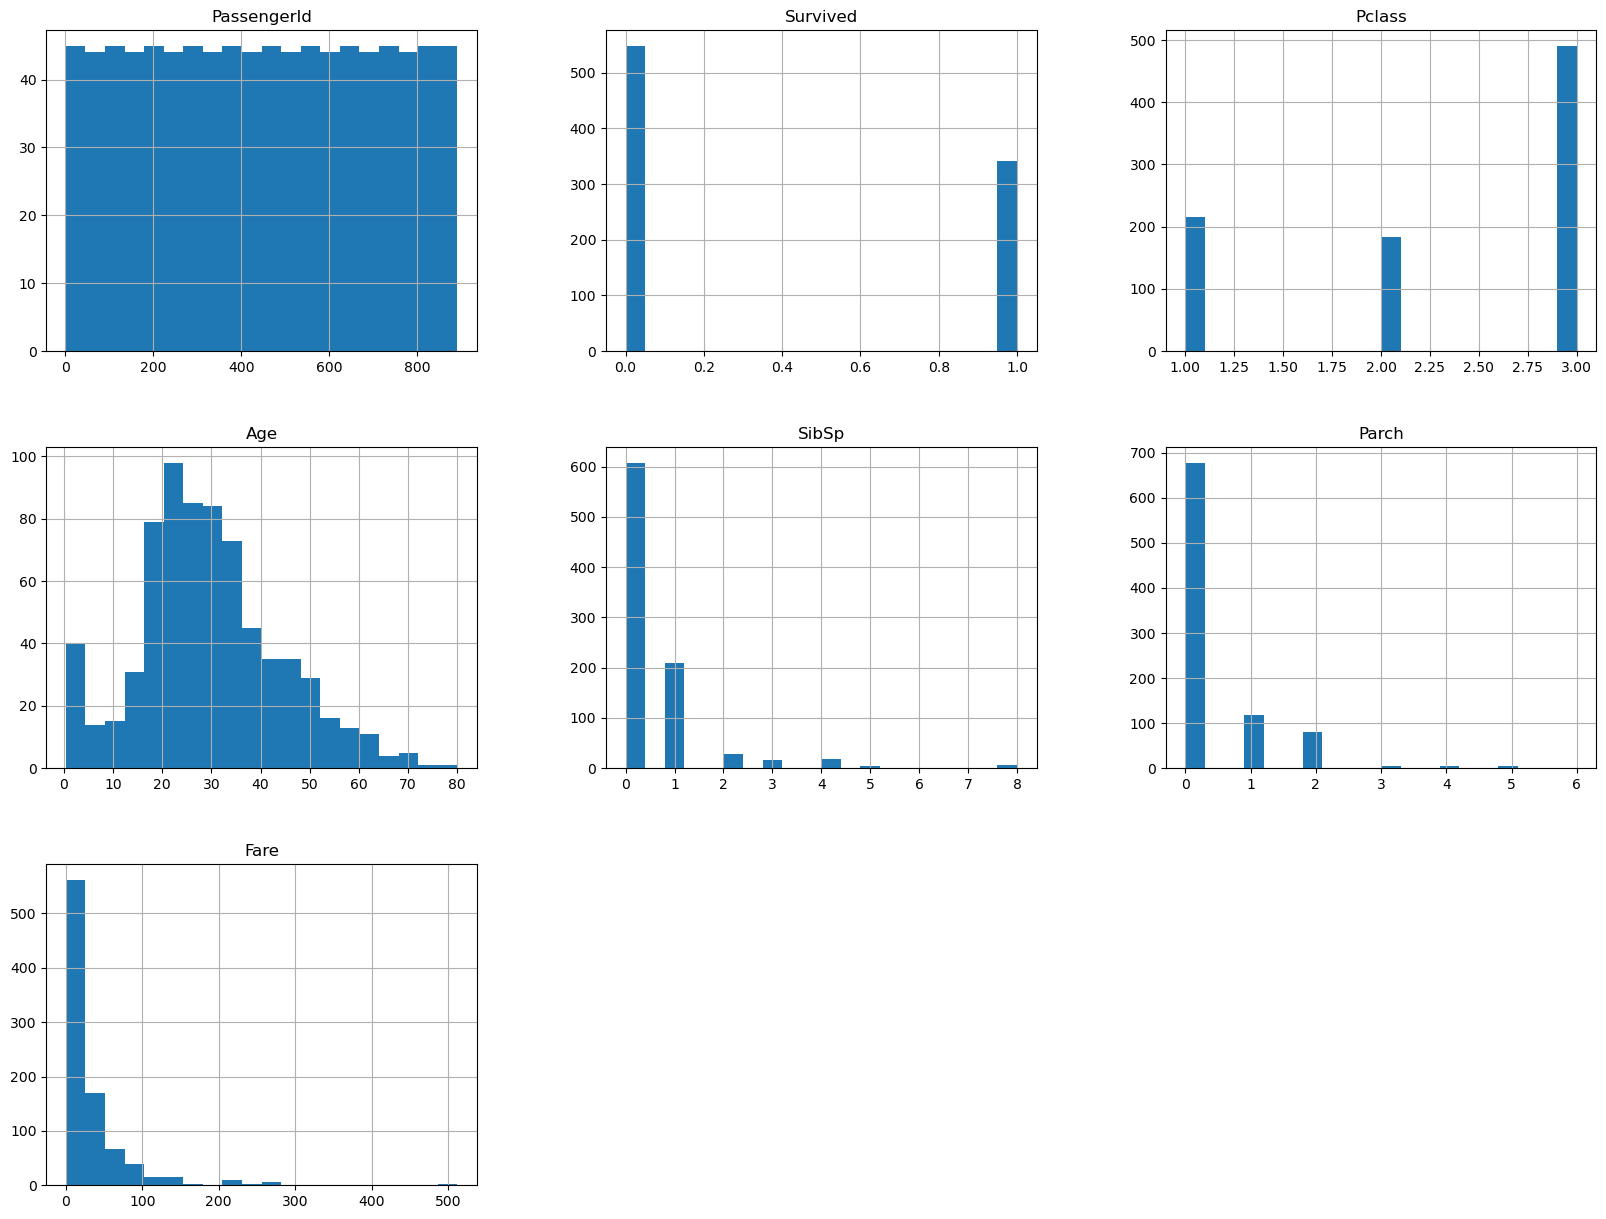

In [11]:
# Histograms of features
train_df.hist(bins=20, figsize=(20, 15))
plt.show()

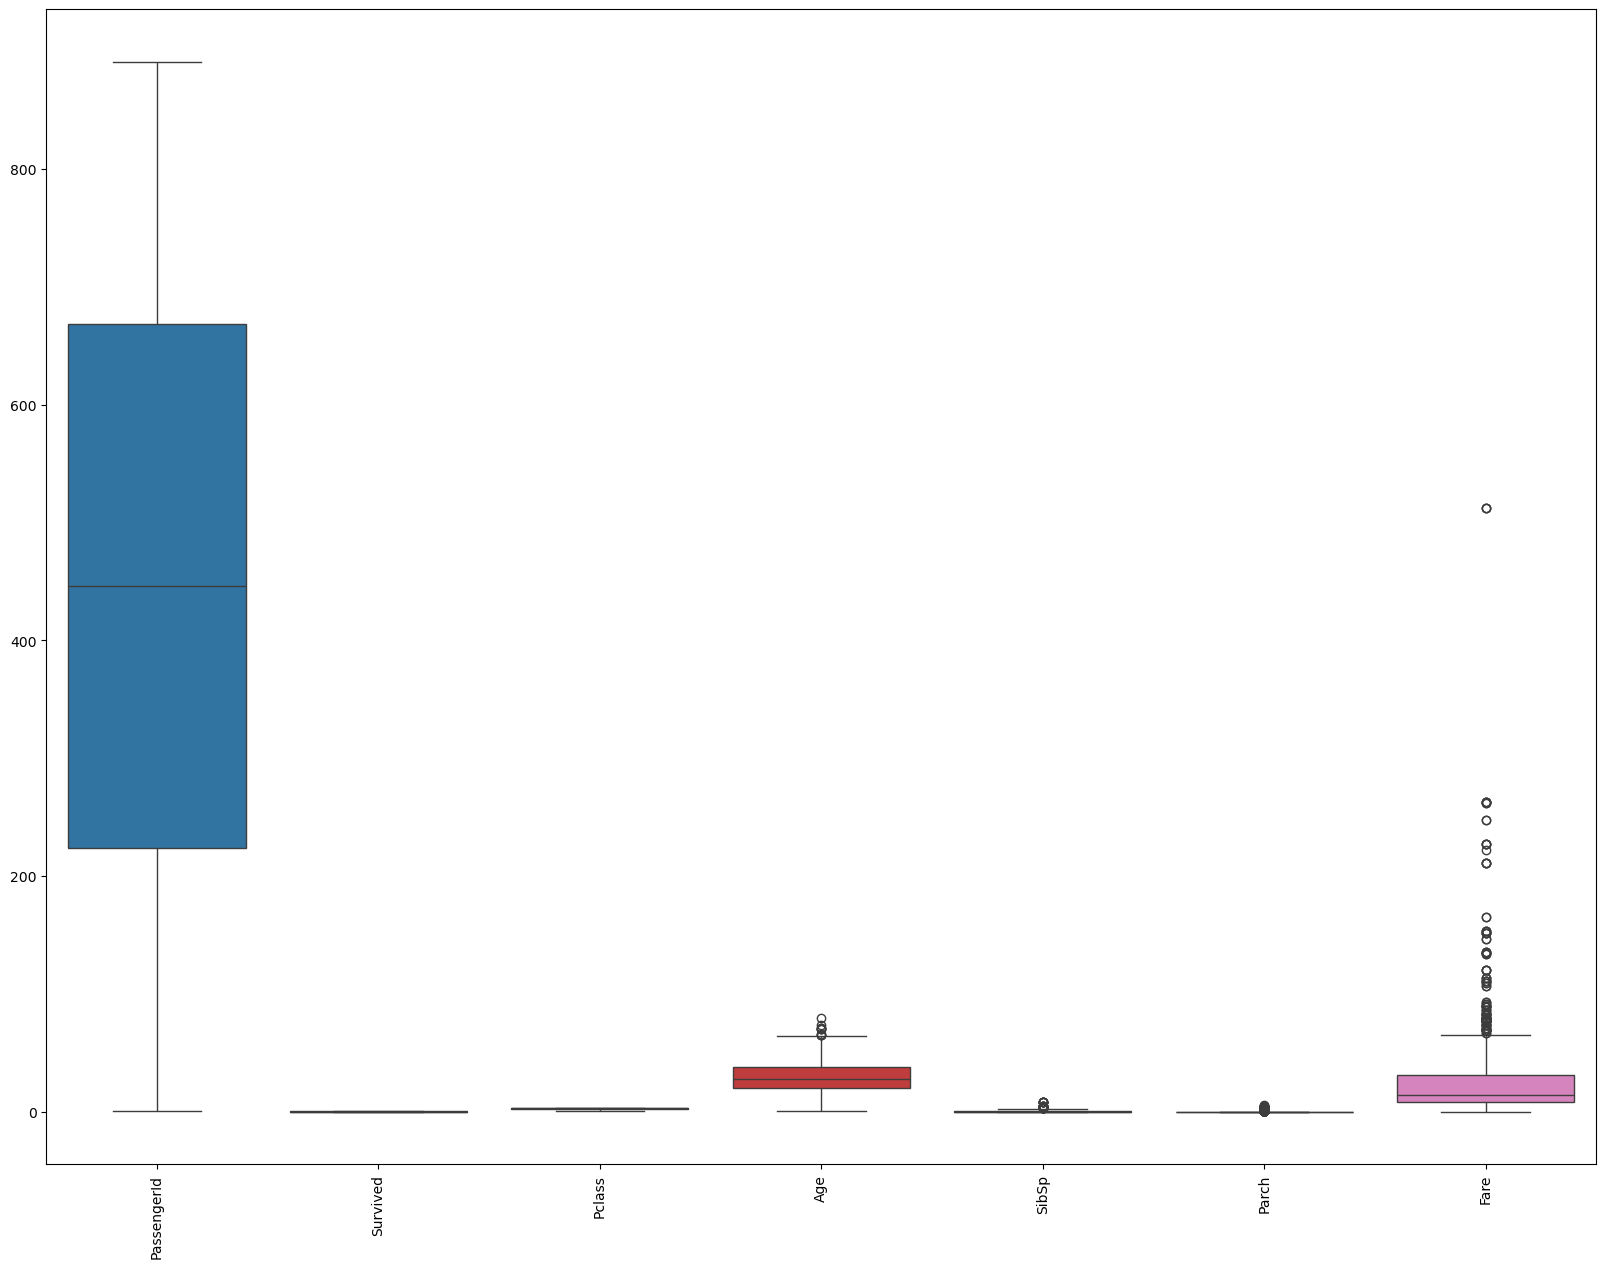

In [12]:
# Box plots of features
plt.figure(figsize=(20, 15))
sns.boxplot(data=train_df)
plt.xticks(rotation=90)
plt.show()

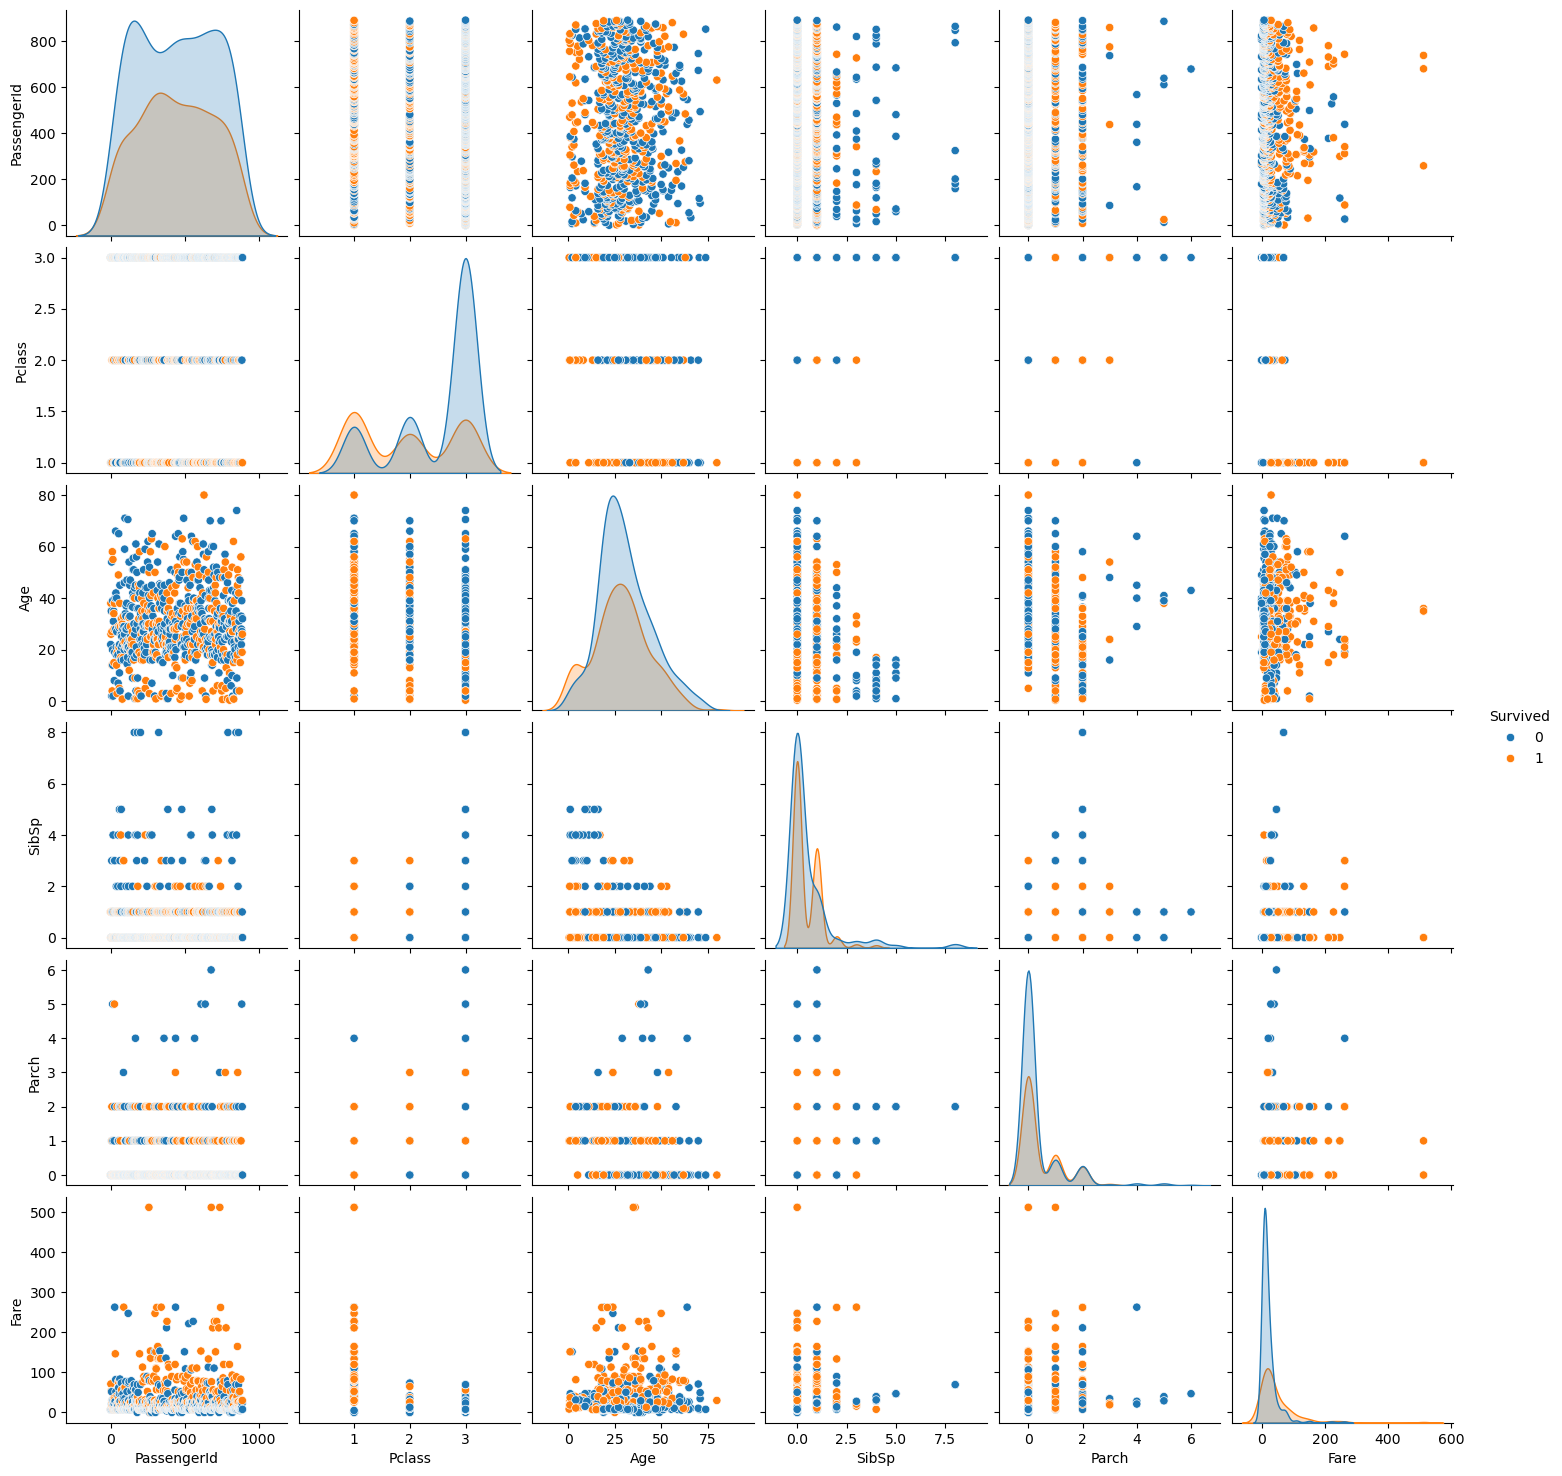

In [13]:
# Scatter plots and bar plots for relationships between features and survival
sns.pairplot(train_df, hue='Survived')
plt.show()

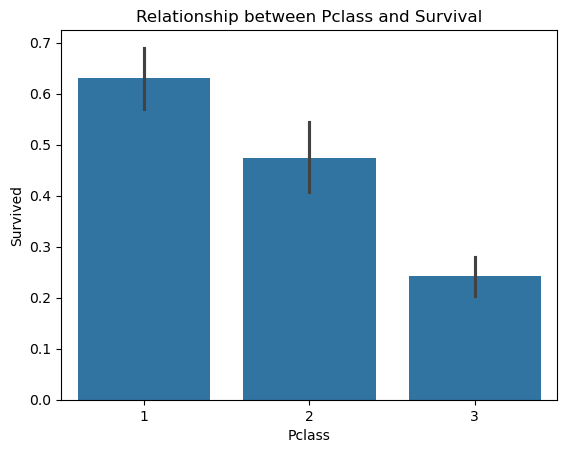

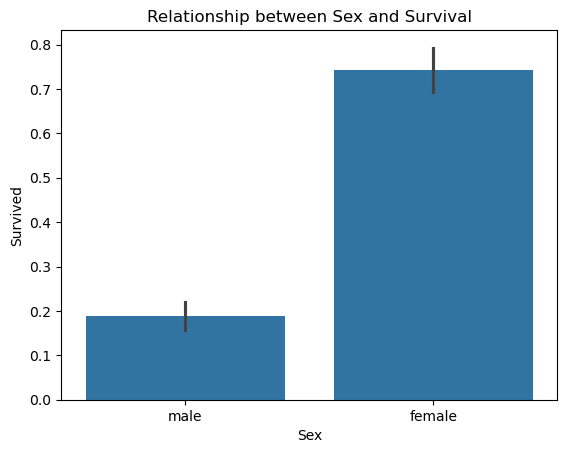

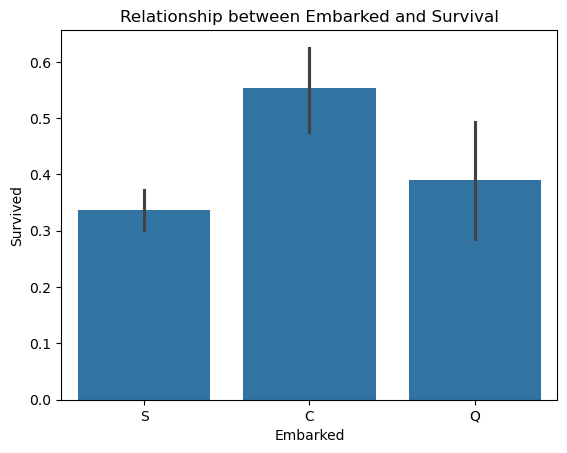

In [14]:
# Bar plots for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    sns.barplot(x=feature, y='Survived', data=train_df)
    plt.title(f'Relationship between {feature} and Survival')
    plt.show()

#### Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder

# Impute missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [16]:
# Encode categorical variables
label_enc = LabelEncoder()
for feature in ['Sex', 'Embarked']:
    train_df[feature] = label_enc.fit_transform(train_df[feature])
    test_df[feature] = label_enc.transform(test_df[feature])

In [17]:
# Drop irrelevant columns
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [19]:
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    1  34.5      0      0   7.8292         1
1          893       3    0  47.0      1      0   7.0000         2
2          894       2    1  62.0      0      0   9.6875         1
3          895       3    1  27.0      0      0   8.6625         2
4          896       3    0  22.0      1      1  12.2875         2


#### Building Predictive Models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

In [21]:
# Split the dataset
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Define evaluation metrics function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [23]:
# LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)
lgb_metrics = evaluate_model(y_val, lgb_pred)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [24]:
# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_metrics = evaluate_model(y_val, xgb_pred)

In [25]:
print("LightGBM metrics:", lgb_metrics)
print("XGBoost metrics:", xgb_metrics)

LightGBM metrics: (0.8100558659217877, 0.7777777777777778, 0.7567567567567568, 0.7671232876712328)
XGBoost metrics: (0.7877094972067039, 0.7571428571428571, 0.7162162162162162, 0.7361111111111112)


#### Comparative Analysis and Visualization

In [26]:
# Combine the metrics into a DataFrame for easier comparison
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': lgb_metrics,
    'XGBoost': xgb_metrics
})

print(metrics_df)

      Metric  LightGBM   XGBoost
0   Accuracy  0.810056  0.787709
1  Precision  0.777778  0.757143
2     Recall  0.756757  0.716216
3   F1-Score  0.767123  0.736111


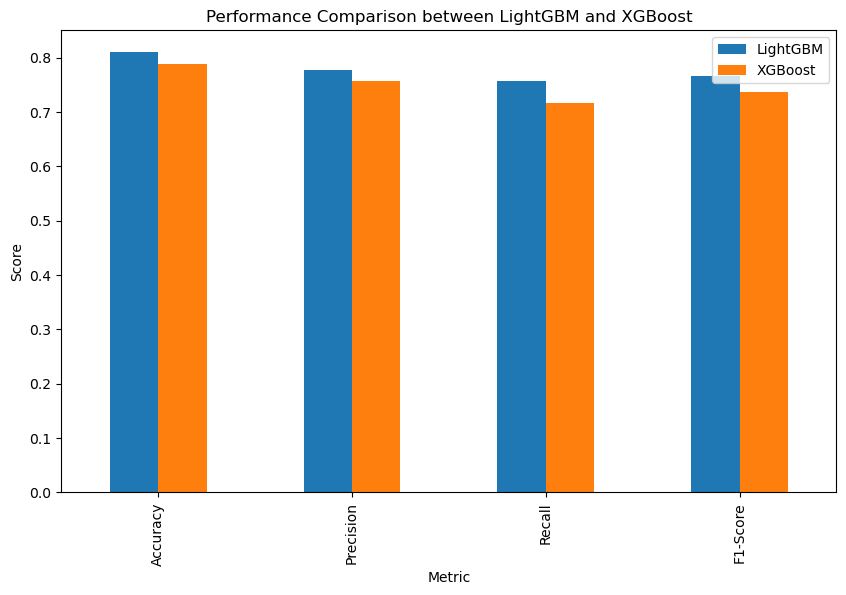

In [27]:
# Visualization of the metrics
metrics_df.set_index('Metric', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison between LightGBM and XGBoost')
plt.ylabel('Score')
plt.show()

#### Conclusion

Both LightGBM and XGBoost performed well on the Titanic dataset, with XGBoost showing a slight edge in terms of accuracy, precision, recall, and F1-score. The results suggest that XGBoost may be more effective for this specific dataset, though the differences are minor.
